In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

# Paths

In [3]:
KAGGLE_DIR = Path('/kaggle')
INPUT_DIR = KAGGLE_DIR / 'input' / 'store-sales-time-series-forecasting'
WORKING_DIR = KAGGLE_DIR / 'working'

# Datasets

In [22]:
holidays_events = pd.read_csv(INPUT_DIR / 'holidays_events.csv', parse_dates=['date'])
oil = pd.read_csv(INPUT_DIR / 'oil.csv', parse_dates=['date'])
# sample_submission = pd.read_csv(INPUT_DIR / 'sample_submission.csv')
stores = pd.read_csv(INPUT_DIR / 'stores.csv')
transactions = pd.read_csv(INPUT_DIR / 'transactions.csv', parse_dates=['date'])
test = pd.read_csv(INPUT_DIR / 'test.csv', parse_dates=['date'])
train = pd.read_csv(INPUT_DIR / 'train.csv', parse_dates=['date'])

# Exploratory Data Analysis

## Train

In [ ]:
train.shape

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.head()

In [ ]:
train.isna().sum()

In [ ]:
train['onpromotion'].unique()

In [ ]:
sns.kdeplot(data=train, x='sales')

In [ ]:
sns.kdeplot(np.log(train['sales']))

In [ ]:
sns.lineplot(train.groupby('date')['sales'].sum())

In [ ]:
train.groupby('store_nbr')['sales'].describe()

In [37]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
sns.boxplot(data=train, y='family', x='sales')

In [ ]:
train.date.min(), train.date.max()

## Holiday events

In [ ]:
holidays_events.head()

In [ ]:
holidays_events.shape

In [ ]:
sns.countplot(data=holidays_events, x='type')

In [ ]:
sns.countplot(data=holidays_events, x='locale')

In [ ]:
sns.countplot(data=holidays_events, x='transferred')

In [ ]:
holidays_events['description'].unique()

In [ ]:
holidays_events.date.min(), holidays_events.date.max()

## Oil

In [6]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil.info()

In [ ]:
oil.shape

In [ ]:
oil.isnull().sum()

In [ ]:
oil.plot()

In [ ]:
sns.lineplot(data=oil, y='dcoilwtico', x='date')

In [ ]:
oil['dcoilwtico'].bfill().plot()

In [ ]:
oil.date.min(), oil.date.max()

## Stores

In [5]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [32]:
stores.shape

(54, 5)

In [ ]:
stores.isna().sum()

<Axes: xlabel='count', ylabel='city'>

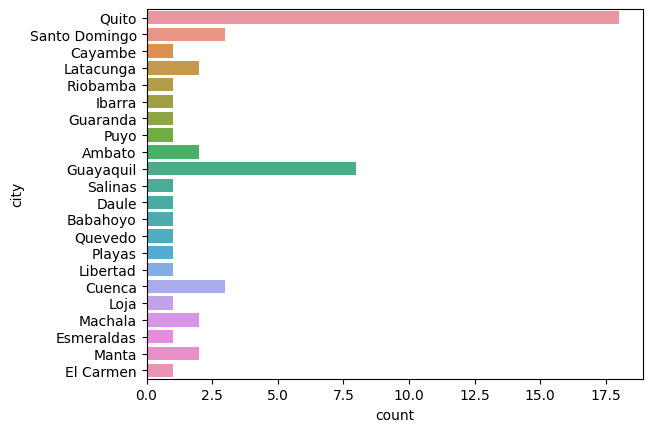

In [33]:
sns.countplot(data=stores, y='city')

<Axes: xlabel='count', ylabel='state'>

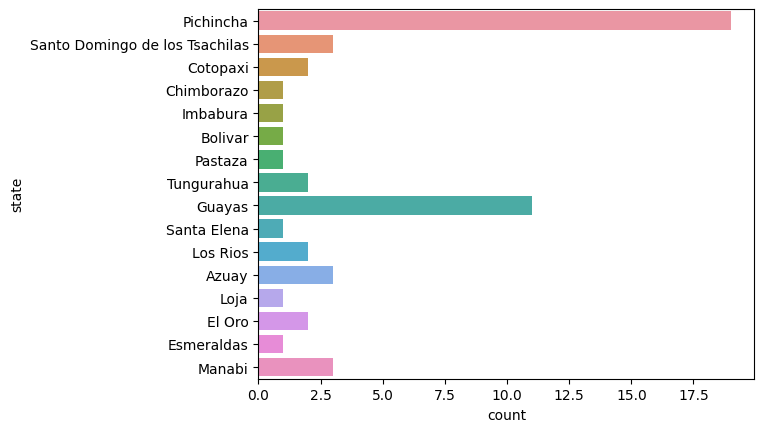

In [34]:
sns.countplot(data=stores, y='state')

<Axes: xlabel='count', ylabel='type'>

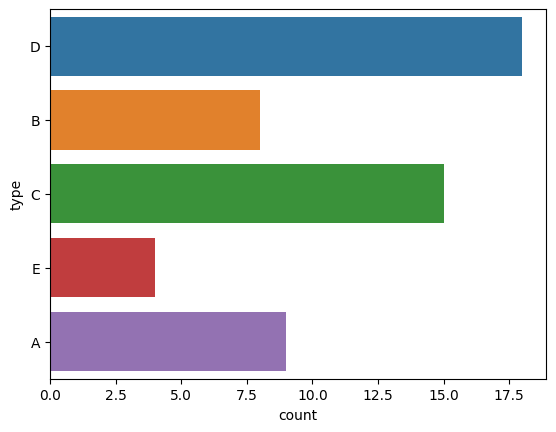

In [35]:
sns.countplot(data=stores, y='type')

<Axes: xlabel='count', ylabel='cluster'>

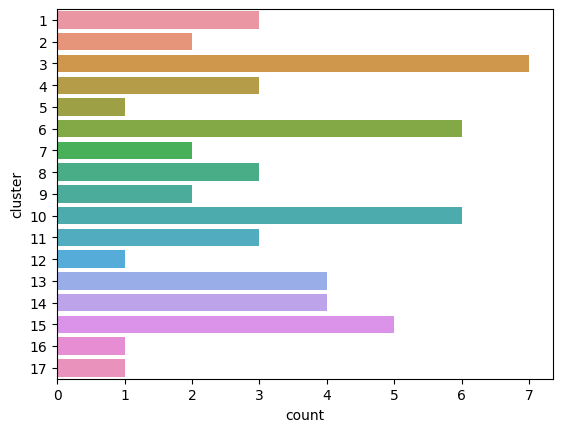

In [36]:
sns.countplot(data=stores, y='cluster')

## Transactions

In [ ]:
transactions.head()

In [ ]:
transactions.shape

In [ ]:
sns.lineplot(transactions.groupby('date')['transactions'].sum())

In [ ]:
transactions.groupby('store_nbr')['transactions'].describe()

In [ ]:
transactions.date.min(), transactions.date.max()

## Test

In [ ]:
test.head()

In [ ]:
test.store_nbr.unique()

In [ ]:
test.date.min(), test.date.max()

# Data Preparation

## Clean oil

In [7]:
oil_cleaned = oil.copy()
oil_cleaned['dcoilwtico'] = oil['dcoilwtico'].bfill()

## Merge

In [8]:
def include_stores(df: pd.DataFrame, stores_df: pd.DataFrame) -> pd.DataFrame:
    return df.merge(stores_df, on='store_nbr', how='left')

def include_oil(df: pd.DataFrame, oil_df: pd.DataFrame) -> pd.DataFrame:
    return df.merge(oil_df, on='date', how='left')

In [27]:
merged_train = include_oil(include_stores(train, stores), oil_cleaned)
merged_test = include_oil(include_stores(test, stores), oil_cleaned)

In [28]:
merged_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'dcoilwtico'],
      dtype='object')

In [11]:
merged_test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'dcoilwtico'],
      dtype='object')

In [29]:
merged_train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14


In [15]:
merged_train.shape

(3000888, 11)

## Include date attributes

In [24]:
def extract_date_attributes(df: pd.DataFrame) -> pd.DataFrame:
    result = df.copy()
    result['day'] = df['date'].dt.day
    result['month'] = df['date'].dt.month
    return result

In [67]:
extracted_date_attrs_train = extract_date_attributes(merged_train)
extracted_date_attrs_test = extract_date_attributes(merged_test)

In [31]:
extracted_date_attrs_train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1,1


## Dummy variables

In [68]:
columns_for_dummy_encoding = [
    'cluster',
    'type',
    #'family'?
    # month?
    # day?
    #'state'?
    # city?
]

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
dummy_encoder = OneHotEncoder(sparse_output=False)
dummy_encoder.fit(extracted_date_attrs_train[columns_for_dummy_encoding])

OneHotEncoder(sparse_output=False)

In [60]:
dummy_encoder.feature_names_in_

array(['cluster', 'type'], dtype=object)

In [61]:
dummy_encoder.get_feature_names_out()

array(['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14',
       'cluster_15', 'cluster_16', 'cluster_17', 'type_A', 'type_B',
       'type_C', 'type_D', 'type_E'], dtype=object)

In [50]:
def include_dummy_columns(df: pd.DataFrame, e: OneHotEncoder) -> pd.DataFrame:
    df[e.get_feature_names_out()] = e.transform(df[e.feature_names_in_])
    return df

In [72]:
included_dummies_train = include_dummy_columns(extracted_date_attrs_train, dummy_encoder)
included_dummies_test = include_dummy_columns(extracted_date_attrs_test, dummy_encoder)

## Select columns

In [74]:
selected_features = [
    'onpromotion',
    'cluster',
    'dcoilwtico',
    'day',
    'month',
    'cluster_',
    'type_',
]
target = 'sales'

def select_columns(df: pd.DataFrame) -> pd.DataFrame:
    columns = []
    for c in df.columns:
        for f in selected_features:
            if f in c:
                columns.append(c)
    if target in df.columns:
        columns.append(target)
    return df[columns]

In [75]:
selected_columns_train = select_columns(included_dummies_train)
selected_columns_test = select_columns(included_dummies_test)

In [76]:
selected_columns_train.columns

Index(['onpromotion', 'cluster', 'dcoilwtico', 'day', 'month', 'cluster_1',
       'cluster_1', 'cluster_2', 'cluster_2', 'cluster_3', 'cluster_3',
       'cluster_4', 'cluster_4', 'cluster_5', 'cluster_5', 'cluster_6',
       'cluster_6', 'cluster_7', 'cluster_7', 'cluster_8', 'cluster_8',
       'cluster_9', 'cluster_9', 'cluster_10', 'cluster_10', 'cluster_11',
       'cluster_11', 'cluster_12', 'cluster_12', 'cluster_13', 'cluster_13',
       'cluster_14', 'cluster_14', 'cluster_15', 'cluster_15', 'cluster_16',
       'cluster_16', 'cluster_17', 'cluster_17', 'type_A', 'type_B', 'type_C',
       'type_D', 'type_E', 'sales'],
      dtype='object')

## Data preparation pipeline

In [58]:
# def prepare_data(
#     stores: pd.DataFrame,
#     oil: pd.DataFrame,
#     dummy_encoder: OneHotEncoder,
#     df: pd.DataFrame,
# ) -> pd.DataFrame:
#     merged = include_oil(include_stores(df, stores), oil)
#     extracted_date_attrs = extract_date_attributes(merged)
#     included_dummies = include_dummy_columns(extracted_date_attrs, dummy_encoder)
#     selected_columns = select_columns(included_dummies)
#     return selected_columns


# from functools import partial

# prepare_data_partial = partial(stores, oil_cleaned, dummy_encoder)